In [16]:
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

df_A = pd.read_csv('AEP_daily.csv')
df_A ['Datetime']= pd.to_datetime(df_A['Datetime'])
df_A = df_A.set_index('Datetime')
df_A

,AEP_MW
Datetime,
2004-10-01,14284.52174
2004-10-02,12999.87500
2004-10-03,12227.08333
2004-10-04,14309.04167
2004-10-05,14439.70833
...,...
2018-07-30,15368.08333
2018-07-31,15180.29167
2018-08-01,15151.16667


In [36]:
# https://www.aprendemachinelearning.com/pronostico-de-series-temporales-con-redes-neuronales-en-python/

def series_to_array(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1] #reshape to  list
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [37]:
pasos = 5
x = series_to_array(df_A, pasos) #segments the data to with specific steps (array w x n-w)
x

,var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
Datetime,,,,,
2004-10-06,14284.52174,12999.87500,12227.08333,14309.04167,14439.70833
2004-10-07,12999.87500,12227.08333,14309.04167,14439.70833,14424.79167
2004-10-08,12227.08333,14309.04167,14439.70833,14424.79167,14449.41667
2004-10-09,14309.04167,14439.70833,14424.79167,14449.41667,14350.33333
2004-10-10,14439.70833,14424.79167,14449.41667,14350.33333,12934.54167
...,...,...,...,...,...
2018-07-30,16503.33333,16474.25000,15816.62500,14113.08333,13658.00000
2018-07-31,16474.25000,15816.62500,14113.08333,13658.00000,15368.08333
2018-08-01,15816.62500,14113.08333,13658.00000,15368.08333,15180.29167


In [38]:
df_A_copy = df_A_.copy()

df_A_values = df_A_copy.drop(df_A_copy.index[0:pasos],axis=0) # to get same rows while graphing
df_A_values

,AEP_MW
Datetime,
2004-10-06,14424.79167
2004-10-07,14449.41667
2004-10-08,14350.33333
2004-10-09,12934.54167
2004-10-10,12260.37500
...,...
2018-07-30,15368.08333
2018-07-31,15180.29167
2018-08-01,15151.16667


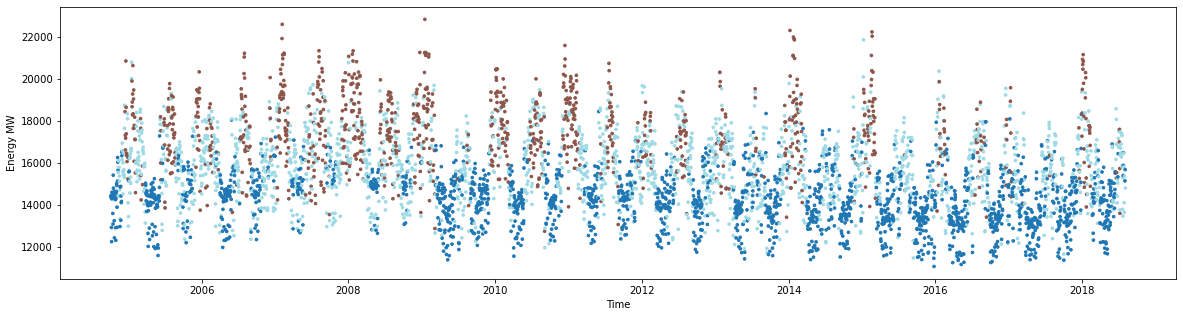

In [41]:
kmeans = KMeans(n_clusters=3,random_state=10).fit(x)

y_predict = kmeans.predict(x) 

plt.figure(figsize=(20,5))
plt.scatter(df_A_values.index, df_A_values['AEP_MW'], c=y_predict, cmap='tab20', s=7)
plt.xlabel('Time')
plt.ylabel('Energy MW')
plt.show()